In [93]:
# Libaries
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

In [70]:
# Define the new working directory path
new_working_directory = r'/Users/nicol1/Documents/GitHub/sports-data'

# Change the current working directory
os.chdir(new_working_directory)

In [71]:
# Define the path 
data_folder = 'data/'

# Load the CSV files to df
cleaned_df = pd.read_csv(data_folder + 'cleaned_df.csv')
cleaned_df

player_id                name    country  height   foot    position  \
0        122011    Markus Henriksen     Norway   187.0  right    Defender   
1         14940          Razvan Rat    Romania   179.0   left    Defender   
2         14942         Darijo Srna    Croatia   182.0  right    Defender   
3         26267         Fernandinho     Brazil   179.0  right    Midfield   
4         55735  Henrikh Mkhitaryan    Armenia   177.0   both    Midfield   
...         ...                 ...        ...     ...    ...         ...   
8071     941869      Yellu Santiago      Spain   192.0  right    Midfield   
8072     667991    Alaa Bellaarouch    Morocco   188.0  right  Goalkeeper   
8073     405690        Ole Pohlmann    Germany   183.0  right    Midfield   
8074     225963   Lautaro Giannetti  Argentina   185.0  right    Defender   
8075     872184       Tadeo Allende  Argentina   183.0  right      Attack   

      highest_market_value current_club_domestic_competition_id  \
0                5000000.0                                  GB1   
1                6500000.0                                  ES1   
2               17500000.0                                  IT1   
3               32000000.0                                  GB1   
4               37000000.0                                  IT1   
...                    ...                                  ...   
8071              100000.0                                  ES1   
8072              200000.0                                  FR1   
8073              700000.0                                   L1   
8074             5000000.0                                  IT1   
8075             4500000.0                                  ES1   

      number_games_played  total_minutes  ...  red_cards_sum  red_cards_avg  \
0                     165          12199  ...              1       0.006061   
1                      97           7690  ...              1       0.010309   
2                     227          19598  ...              2       0.008811   
3                     399          30325  ...              3       0.007519   
4                     485          35878  ...              0       0.000000   
...                   ...            ...  ...            ...            ...   
8071                    3            153  ...              0       0.000000   
8072                    1             90  ...              0       0.000000   
8073                    1             31  ...              0       0.000000   
8074                    1             90  ...              0       0.000000   
8075                    1             17  ...              0       0.000000   

      goals  avg_goals_per_game  assists   age  year  avg_games_per_year  \
0        33            0.200000       22  45.0     6           27.500000   
1         3            0.030928       13  43.0     5           19.400000   
2        22            0.096916       68  45.0     8           28.375000   
3        29            0.072682       41  42.0    11           36.272727   
4       128            0.263918      119  43.0    13           37.307692   
...     ...                 ...      ...   ...   ...                 ...   
8071      0            0.000000        0  26.0     1            3.000000   
8072      0            0.000000        0  27.0     1            1.000000   
8073      0            0.000000        0  26.0     1            1.000000   
8074      0            0.000000        0  27.0     1            1.000000   
8075      0            0.000000        0  27.0     1            1.000000   

      avg_goals_per_year  avg_assists_per_year  
0               5.500000              3.666667  
1               0.600000              2.600000  
2               2.750000              8.500000  
3               2.636364              3.727273  
4               9.846154              9.153846  
...                  ...                   ...  
8071            0.000000              0.000000  
8072            0.0000

In [72]:
# Filter the position for goalkeeper
striker_df = cleaned_df[cleaned_df['position'] == 'Attack']
striker_df
#print(goalkeeper_df.head)
# drop NaN values
striker_df = striker_df.dropna()


# Fairplay index
yellow_card_weight = 1
red_card_weight = 3

composite_score = striker_df['yellow_cards_avg'] * yellow_card_weight + striker_df['red_cards_avg'] * red_card_weight
fairplay_index = (composite_score - composite_score.min()) / (composite_score.max() - composite_score.min())
striker_df['fairplay_index'] = fairplay_index

In [73]:
# Select only numeric columns
col_remove = ['player_id', 'highest_market_value', 'red_cards_sum', 'red_cards_avg', 'yellow_cards_sum', 'yellow_cards_avg']
striker_df_without = striker_df.drop(columns = col_remove)
numeric_columns = striker_df_without.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numeric_columns.corr()

# Print corr matrix
print(correlation_matrix)



                        height  number_games_played  total_minutes  \
height                1.000000             0.017280       0.011154   
number_games_played   0.017280             1.000000       0.982217   
total_minutes         0.011154             0.982217       1.000000   
average_minutes       0.029461             0.550738       0.579885   
goals                 0.072450             0.841676       0.887257   
avg_goals_per_game    0.160649             0.518394       0.546830   
assists              -0.048847             0.877824       0.911179   
age                  -0.028779             0.363659       0.368435   
year                  0.035073             0.926214       0.880010   
avg_games_per_year    0.028734             0.870453       0.848261   
avg_goals_per_year    0.106931             0.781548       0.824748   
avg_assists_per_year -0.065049             0.795726       0.827472   
fairplay_index       -0.001691             0.091126       0.097075   

                   

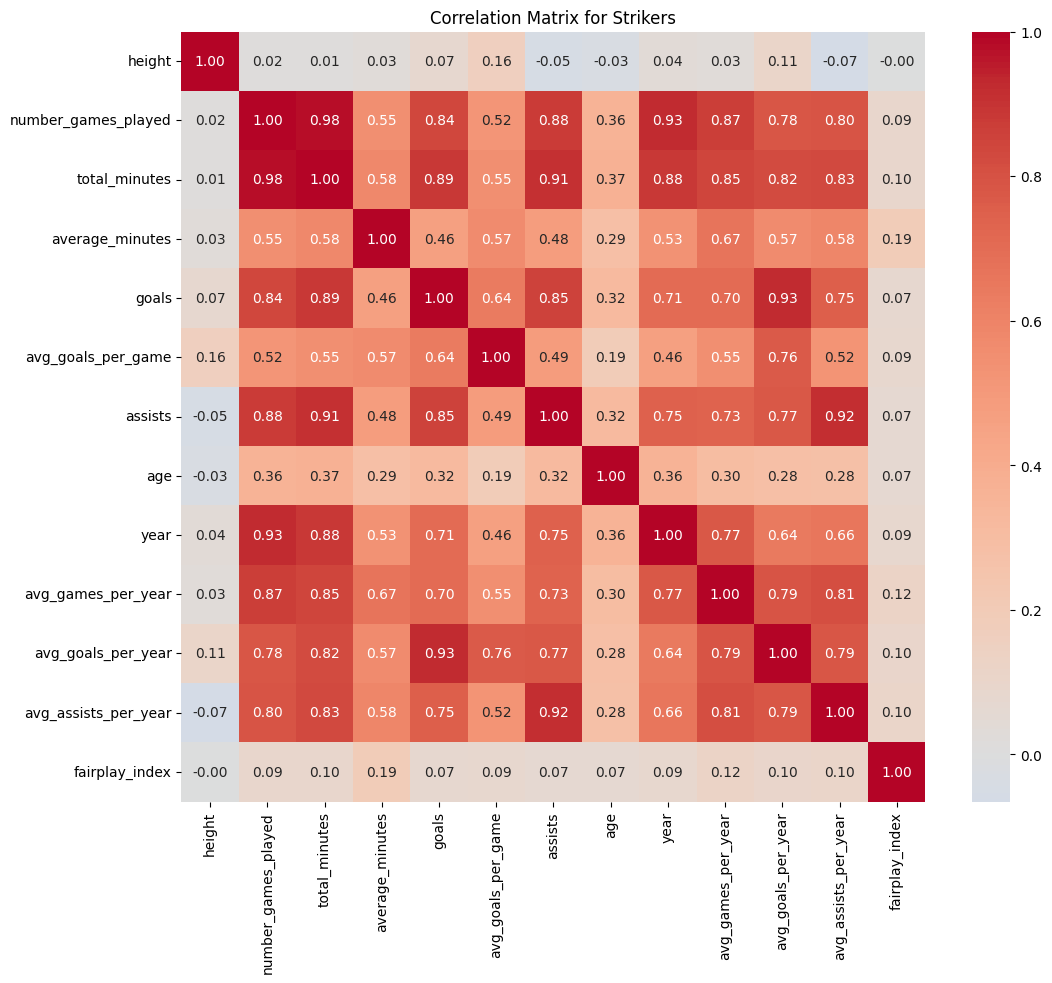

In [74]:
# Plotting correlation matrix


plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", center=0)
plt.title('Correlation Matrix for Strikers')
plt.show()
# bei 0 sollte es weiss sein und dann nicht korreliert und negativ korreliert sollten sich fabrlich unterscheiden (nach anderen colorcode suchen)
# highest market value rausnehmen (dependent variable), player ID auch rausnhemen
# hochkorrelierte attributen: (keine PCA!!!) 
# filtern
# highest market value ist überall hoch korreliert (negativ oder positiv)
# minutes vs total games: minutes was uns interessiert
# wenn etwas nicht korreliert ist mit market value NICht rauswerfen kann immer noch zsmhang haben der nicht linear ist
# avg minutes, total minutes, number games: zusammensetzten von avg. minutes und number games: ist es für markt wichtig viele spiele mit wenig spielen oder wenig spiele mit vielen minuten (feature construction)
# yellow and red cards zusammennehmen: fairplay index? 

#Correlation Matrix
- total minutes vs number games = high correlation: we want the total minutes
- total minutes: 
    - high corelation to goals
    -  total minutes and asist have a high correlation 
    - high correlation to avg_assist / avg_goals = also have high correlation between avg_assist_per_year and assist = we keep avg_assists_per_year
    - high correlation to  year and avg_games per year (high correlation between those two) = keep avg_gamess_per_year
- average minutes:
    - no high correlation
goals:
    - high correlation  to total_minutes
    - high correlation to assists
    - high correlation to year and avg_games_per_year
    - high correlation to avg_goals _per_year
    => drop goals vor avg_goals per year


- high correlation between avg_gales_per game and avg_goals per year 
    keep avg_goals_per_Year

keeping: total_minutes, avg_minutes, year, avg_games_per_year, avg_goals_per_year, age, fairplay_index and avg_assist_per_year



In [77]:

# Divide data into IV (X) y DV (y)
X = striker_df[['total_minutes', 'average_minutes', 'fairplay_index',
          'age', 'year', 'avg_games_per_year', 'avg_goals_per_year', 'avg_assists_per_year']]
y = striker_df['highest_market_value']

# Divide data into trial and error 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [78]:

# Initialize Linear Regression Model
model = LinearRegression()

# Train
model.fit(X_train, y_train)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


import statsmodels.api as sm

# Add a constant to the X_train data for the intercept term
X_train_with_const = sm.add_constant(X_train)

# Initialize and fit the model
linear_model = sm.OLS(y_train, X_train_with_const).fit()

# Get the summary of the model which includes p-values
print(linear_model.summary())

Coefficients: [ 2.52021389e+02 -6.66197557e+04 -1.41725992e+07 -4.17740641e+05
  5.58868900e+04 -4.34768138e+05  2.56079661e+06  6.38726625e+06]
Intercept: 16558433.251821334
                             OLS Regression Results                             
Dep. Variable:     highest_market_value   R-squared:                       0.639
Model:                              OLS   Adj. R-squared:                  0.638
Method:                   Least Squares   F-statistic:                     369.3
Date:                  Sun, 18 Feb 2024   Prob (F-statistic):               0.00
Time:                          14:38:56   Log-Likelihood:                -29785.
No. Observations:                  1676   AIC:                         5.959e+04
Df Residuals:                      1667   BIC:                         5.964e+04
Df Model:                             8                                         
Covariance Type:              nonrobust                                         
               

In [88]:
# LASSSO
lasso_model = Lasso(alpha=1.0)  # Adjust alpha based on your needs

# Train the model
lasso_model.fit(X_train, y_train)

# Create a DataFrame for coefficients
lasso_results = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': lasso_model.coef_})

# Print coefficients
print(lasso_results)


                Feature   Coefficient
0         total_minutes  2.520221e+02
1       average_minutes -6.662003e+04
2        fairplay_index -1.417197e+07
3                   age -4.177407e+05
4                  year  5.588601e+04
5    avg_games_per_year -4.347680e+05
6    avg_goals_per_year  2.560796e+06
7  avg_assists_per_year  6.387265e+06


In [95]:
# Ridge Regression
ridge_model = Ridge(alpha=1.0)  # Adjust alpha based on your needs

# Train the model
ridge_model.fit(X_train, y_train)

# Create a DataFrame for coefficients
ridge_results = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': ridge_model.coef_})
print(ridge_results)

                Feature   Coefficient
0         total_minutes  2.539255e+02
1       average_minutes -6.834438e+04
2        fairplay_index -1.031204e+07
3                   age -4.182422e+05
4                  year  5.510162e+04
5    avg_games_per_year -4.347766e+05
6    avg_goals_per_year  2.561414e+06
7  avg_assists_per_year  6.380915e+06


In [96]:
# SVR 
svr_model = SVR(kernel='rbf')  # Radial Basis Function kernel is commonly used

# Train the model
svr_model.fit(X_train, y_train)

# Predictions using SVR model (optional)
svr_predictions = svr_model.predict(X_test)

[3999475.82672965 3999971.67154901 3999885.73462353 3999373.99644684
 4000000.82618889 3999373.89601583 4000002.45209631 3999507.42551957
 3999373.67317409 3999909.50059865 3999903.74694152 3999376.99044503
 3999379.97854668 3999455.90060845 3999381.02692334 3999707.08734347
 3999599.0757967  4000005.50246432 3999374.70399213 3999855.78559972
 3999373.67299936 3999373.99642326 3999942.96000516 3999377.63329035
 3999397.18650332 3999375.24427478 3999436.88575075 3999677.42748746
 3999531.24405401 3999789.47423826 3999501.59294392 3999374.04682279
 3999374.14737844 3999374.73320201 3999993.18177497 3999376.16062406
 3999392.95210333 3999711.5989267  3999970.36289739 3999497.88204959
 3999867.18313557 3999394.24059745 3999808.73762835 3999790.17274804
 3999483.77463661 3999930.28188608 3999831.24327485 3999966.15265415
 3999381.73669586 3999376.93541594 4000007.2377254  3999376.10756607
 3999972.22222233 3999374.55156283 3999664.36106589 3999975.85559868
 3999373.82138516 3999592.59001481

In [99]:
# Testing the models

# Lasso regression
lasso_intercept = 16558433.251821334  # Example value obtained from your output
lasso_coefficients = [2.520221e+02, -6.662003e+04, -1.417197e+07, -4.177407e+05, 5.588601e+04, -4.347680e+05, 2.560796e+06, 6.387265e+06]  # Example coefficients obtained from your output

def calculate_market_value_lasso(features):
    return lasso_intercept + sum(coeff * feat for coeff, feat in zip(lasso_coefficients, features))

lasso_predictions = [calculate_market_value_lasso(features) for features in X_test.values]

lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_mae = mean_absolute_error(y_test, lasso_predictions)
lasso_r2 = r2_score(y_test, lasso_predictions)

# Linear Regression
linear_intercept = 16558433.251821334  # Example value obtained from your output
linear_coefficients = [2.52021389e+02, -6.66197557e+04, -1.41725992e+07, -4.17740641e+05, 5.58868900e+04, -4.34768138e+05, 2.56079661e+06, 6.38726625e+06]  # Example coefficients obtained from your output

def calculate_market_value_linear(features):
    return linear_intercept + sum(coeff * feat for coeff, feat in zip(linear_coefficients, features))

linear_predictions = [calculate_market_value_linear(features) for features in X_test.values]

linear_mse = mean_squared_error(y_test, linear_predictions)
linear_mae = mean_absolute_error(y_test, linear_predictions)
linear_r2 = r2_score(y_test, linear_predictions)

# Ridge Regression
ridge_model = Ridge(alpha=1.0)  # Adjust alpha based on your needs
ridge_model.fit(X_train, y_train)
ridge_predictions = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_mae = mean_absolute_error(y_test, ridge_predictions)
ridge_r2 = r2_score(y_test, ridge_predictions)

# SVR
# SVR
svr_model = SVR(kernel='rbf')  # Radial Basis Function kernel is commonly used
svr_model.fit(X_train, y_train)
svr_predictions = svr_model.predict(X_test)
svr_mse = mean_squared_error(y_test, svr_predictions)
svr_mae = mean_absolute_error(y_test, svr_predictions)
svr_r2 = r2_score(y_test, svr_predictions)

# Print the evaluation metrics
print("Lasso Regression:")
print("MSE:", lasso_mse)
print("MAE:", lasso_mae)
print("R-squared:", lasso_r2)
print()

print("Linear Regression:")
print("MSE:", linear_mse)
print("MAE:", linear_mae)
print("R-squared:", linear_r2)


print("Ridge Regression:")
print("MSE:", ridge_mse)
print("MAE:", ridge_mae)
print("R-squared:", ridge_r2)
print()


print("SVR:")
print("MSE:", svr_mse)
print("MAE:", svr_mae)
print("R-squared:", svr_r2)
print()

Lasso Regression:
MSE: 136983703952096.61
MAE: 7051179.654726189
R-squared: 0.5240245386288117

Linear Regression:
MSE: 136983771857124.25
MAE: 7051184.122470619
R-squared: 0.5240243026801117
Ridge Regression:
MSE: 136564191523519.05
MAE: 7022217.784781217
R-squared: 0.5254822129067169

SVR:
MSE: 326974492147022.0
MAE: 8691040.769847857
R-squared: -0.13613393612654412



Ridge Regression seems to fit best, but also only slightly better than Lasso and Linear